# DS120-B Programming For Data Science.
# Topic: Covid-19
## Members: Artsvik Avetisyan, Levon Hakobyan, Levon Titanyan, Narek Dilbaryan, Khachik Zakaryan

# Introduction:

Our project is about Covid-19. The
aim of our project is to visualize Covid-19 related data based on 3 datasets
that we chose. With the help of visualizations, it will be much easier to
interpret data. It also makes more visible structures to have an overall image
of Covid-19 related statistics. 


The project includes Reading and
Cleaning Data, Data Analysis, Predicting Models (With the Help of Linear
Regression). 


We used python to make all the
outcomes. There are some python packages only with the help of each it was
possible to make visualizations including: pandas, geopandas, numpy, seaborn etc.

# Importing Packages and Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

The role of each Package and Library
1. pandas-Provides data structures and functions for efficiently handling and analyzing structured data, such as tables or spreadsheets. 

2. matplotlib.pyplot-Provides a variety of functions and classes for creating static and interactive visualizations based on Covis-19 data.

3. numpy-Provides array objects and functions for numerical operations, such as mathematical, shape manipulation, and more.

4. geopandas-Specializes in handling geospatial data. Espacialy for Covid-19, it is a great tool for doing geospatial operations. We used ot for crearing World Heat Map  

5. plotly.express-Inerface creating interactive visualizations with Plotly. It provides a simplified syntax for generating a wide range of plots, such as scatter plots, line plots, bar plots, and more. 

6. plotly.io-Allows you to save and display Plotly figures in different formats, such as HTML, PNG, SVG, and more. 

7. plotly.graph_objects-Helps to create highly customized visualizations with Plotly, such as subplots. 

8. warnings-Provides a way to handle warnings emitted during the execution of a program. the management.

9. warnings.filterwarnings('ignore')-Sets the warning filter to ignore all warnings. Allows to run the code without being alerted to warning messages.

10. seaborn-Provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies the creation of various plots, such as scatter plots, box plots, violin plots, and more. 

11. from sklearn.linear_model import LinearRegression-Provides a wide range of algorithms and tools for tasks.

12. from sklearn.metrics import mean_squared_error: Evaluates the performance of regression models.

# Reading and Cleaning Data

In [2]:
# Load the data
df = pd.read_csv("covid_worldwide.csv")

In [3]:
df.dropna(axis = 0, inplace = True)

In [4]:
df['Total Cases'] = df['Total Cases'].astype(str).str.replace(',', '').astype(int)
df['Total Deaths'] = df['Total Deaths'].astype(str).str.replace(',', '').astype(int)
df['Total Recovered'] = df['Total Recovered'].astype(str).str.replace(',', '').astype(int)
df['Active Cases'] = df['Active Cases'].astype(str).str.replace(',', '').astype(int)
df['Total Test'] = df['Total Test'].astype(str).str.replace(',', '').astype(int)
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(int)

In [5]:
dff = pd.read_csv("covid_data.csv")

In [6]:
# forward fill missing values in new_cases and new_deaths columns
dff['new_cases'].fillna(method='ffill', inplace=True)
dff['new_deaths'].fillna(method='ffill', inplace=True)

# interpolate missing values in total_cases, total_deaths, weekly_cases, weekly_deaths, biweekly_cases, and biweekly_deaths columns
dff['total_cases'].interpolate(method='linear', inplace=True)
dff['total_deaths'].interpolate(method='linear', inplace=True)
dff['weekly_cases'].interpolate(method='linear', inplace=True)
dff['weekly_deaths'].interpolate(method='linear', inplace=True)
dff['biweekly_cases'].interpolate(method='linear', inplace=True)
dff['biweekly_deaths'].interpolate(method='linear', inplace=True)

In [7]:
df2 = pd.read_csv("owid-covid-data.csv")

# Data Analysis

In [8]:
# Calculating total number of Cases and Deaths across all countries
total_cases = df['Total Cases'].sum()
total_deaths = df['Total Deaths'].sum()
print(f'Total Cases: {total_cases} \nTotal Deaths: {total_deaths}')

Total Cases: 649205332 
Total Deaths: 6588473


### Heatmap of the Total Covid Cases

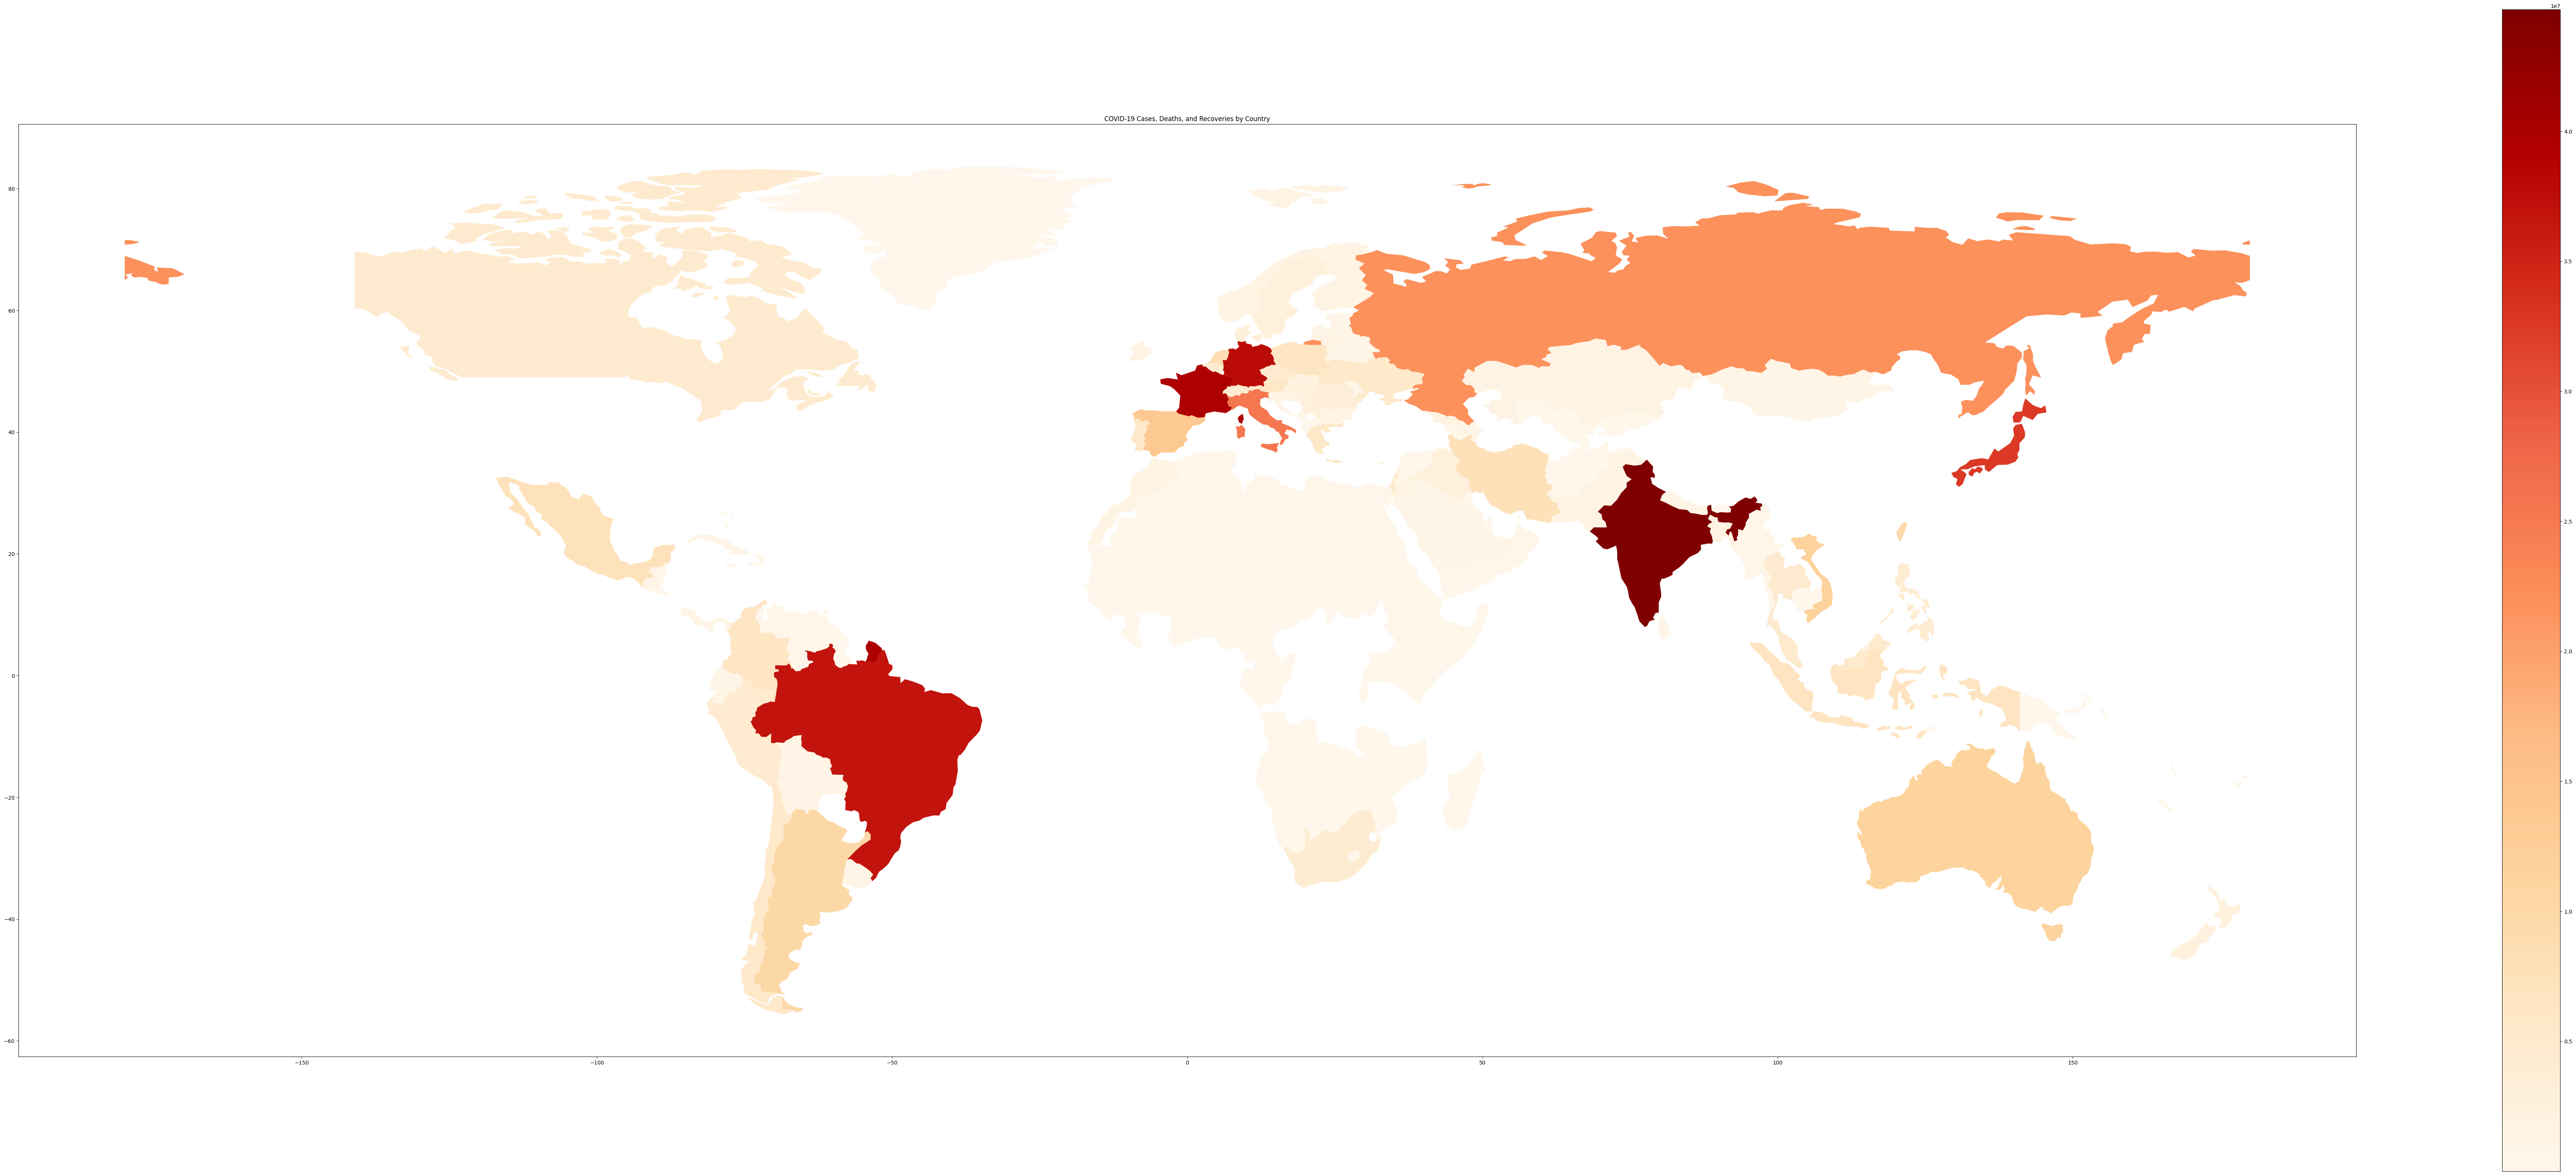

In [9]:
# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with map
merged = world.merge(df, left_on='name', right_on='Country')

# Create map
fig, ax = plt.subplots(figsize=(100, 40))
ax.set_title('COVID-19 Cases, Deaths, and Recoveries by Country')
merged.plot(column='Total Cases', cmap='OrRd', legend=True, ax=ax)
plt.show()

Firstly we needed the shape of map, so loaded the file. AFter merging data and getting the map, we can notice the map showing the cases, deaths and recoveries of each country based on its color from lower (white) to higer (dark red). 

This a representation of the map with the indeces of Total cases highlighted.
We can clearly see that the countries with high level of population and high level of tourists are highlighted with the Red colour, which means that there were the most cases 

### Top 15  by the number of total cases

In [34]:
# Group by country and calculate total cases in millions
top_countries = df.groupby('Country')['Total Cases'].sum().sort_values(ascending=False).iloc[:15]
total_cases = top_countries.sum()
other_cases = max(0, df['Total Cases'].sum() - total_cases)

In [35]:
# Combine top 25 countries and "Other" category
country_cases = pd.concat([top_countries, pd.Series(other_cases, index=['Other'])])

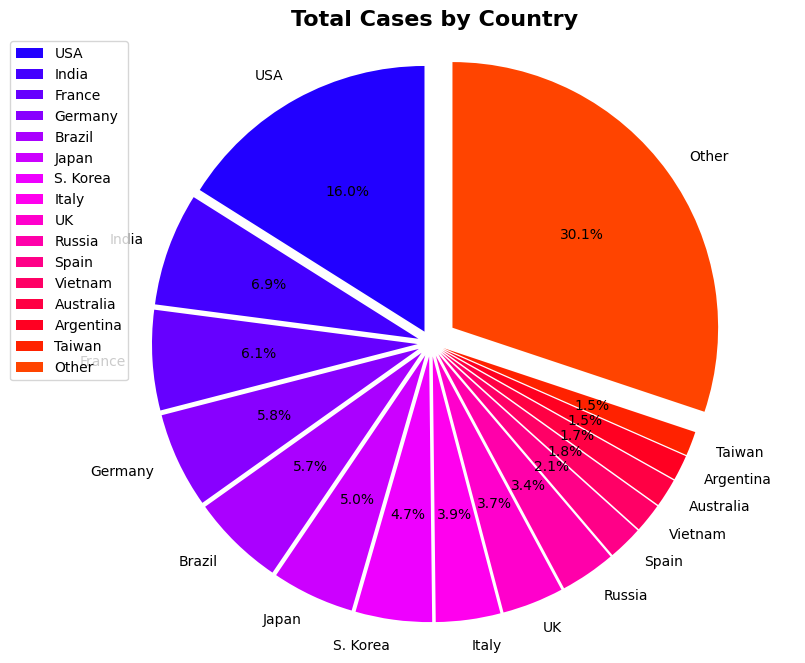

In [36]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Total Cases by Country", fontsize=16, fontweight='bold')

# Define color scheme
colors = ['#2200ff','#4400ff','#6600ff','#8800ff','#aa00ff','#cc00ff','#ee00ff','#ff00ee','#ff00cc','#ff00aa','#ff0088','#ff0066','#ff0044','#ff0022','#ff2200','#ff4400']

# Plot the data
explode = [0.05] * 15 + [0.1]
ax.pie(country_cases, labels=country_cases.index, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 0})

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))

# Remove border and set background color to white
ax.axis('equal')
ax.set_facecolor('white')

# Adjust subplot parameters
plt.subplots_adjust(left=0, right=0.6)
plt.show()

This pie chart shows total cases of Covid-19. We can see the countries with the higest number of cases in percentages (USA, India, France...) as well as the other countries combined in name "other". By defining colors and writing the list of countries in the top left part with labels respectively, we can check both the list and the pie chart at the same time. 

### Top Countries With Active Cases 

In [37]:
df1 = df.dropna() 
df1 = df1.sort_values(by='Active Cases',ascending=False) 
# df1.head() 
bar_active_cases = px.bar( 
    data_frame=df1.head(10), 
    title="Top 10 Active Cases", 
    x="Active Cases",  
    y="Country", 
    orientation="h" 
) 
 
bar_active_cases.update_layout({'bargap':0.5}) 
bar_active_cases.show()

This code creates a horizontal bar chart using the Plotly Express library in Python, showing the top 10 countries by number of active COVID-19 cases. X axis represents the number od cases and Y axis represents the name of countries. 11th line sets the gap between the bars in the chart to 0.5. Bar chart is coded in ascending order.Second line sorts the DataFrame df1 by the "Active Cases" column in descending order. We can see that Japan leading the other countries with the number of active cases. 

We can clearly see how the level of population and the development of the country affected to the level of the Active Cases.

### Top With "Recovered" Score 

In [38]:
df2 = df.dropna() 
df2 = df2.sort_values(by='Total Recovered',ascending=False) 
# df1.head() 
 
bar_total_recovered = px.bar( 
    data_frame=df2.head(10), 
    title="Top 10 Recovered", 
    x="Total Recovered",  
    y="Country", 
    orientation="h" 
) 
 
bar_total_recovered.update_layout({'bargap':0.5}) 
bar_total_recovered.show()

This code also creates a horizontal bar chart using Plotly Express in Python, but instead shows the top 10 countries by total number of COVID-19 recoveries. We can see that the order is again ascending with USA leading with its "recovered" score.

Also we can clearly state that the undustrial and general development of the country had a great influence on the process of recovery.

### Top Countries With Death Cases 

In [39]:
df3 = df.dropna() 
df3 = df3.sort_values(by='Total Deaths',ascending=False) 
# df1.head() 
 
bar_total_deaths = px.bar( 
    data_frame=df3.head(10), 
    title="Top 10 Deaths", 
    x="Total Deaths",  
    y="Country", 
    orientation="h" 
) 
 
bar_total_deaths.update_layout({'bargap':0.5}) 
bar_total_deaths.show()

This code also creates a horizontal bar chart using Plotly Express in Python, but instead shows the top 10 countries by total number of COVID-19 deaths. 

However bigger population, makes more difficult to recover a lot of people, as we can see in this graph death index is higher in the countries with high population.

### Top 25 by death rates

In [41]:
# Sort the data by death rate
df['Death Rate'] = (df['Total Deaths'] / df['Total Cases']) * 100
top_death_rate = df[['Country', 'Death Rate']].sort_values(by='Death Rate', ascending=True).tail(25)

Now, we calculate the death rate for each country by dividing the total number of deaths by the total number of cases, then multiply it by 100, and then select the 25 countries with the highest death rates(third line).

In [42]:
# Create a color scale for the chart
color_scale = [[0, 'lightgray'], [0.5, 'skyblue'], [1, 'darkblue']]

In order to make the graph more pleasant we chose color gradinet, with the highest death rate country having dark blue color (Yemen), and the other countries followed by skyblue (Sudan) and gray based on their rates (for example Haiti).

In [43]:
# Create the bar chart
fig = go.Figure(go.Bar(
x=top_death_rate['Death Rate'],
y=top_death_rate['Country'],
orientation='h',
marker=dict(color=top_death_rate['Death Rate'], coloraxis="coloraxis", showscale=True),
))

For this part, we created a horizontal bar chart where each bar represents a country, and the length of the bar corresponds to its death rate. The color of each bar is determined by its death rate, and a color scale is included.

In [44]:
# Customize the layout
fig.update_layout(
title='Top 25 Countries by Death Rate',
xaxis_title='Death Rate (%)',
yaxis_title='Country',
coloraxis=dict(colorscale=color_scale),
template='plotly_white',
width=800,
height=800,
margin=dict(l=100, r=50, t=100, b=50)
)
fig.show()

Once again, in order to make the graph visually pleasant, we customized the layout of the bar chart by setting the title, axis labels, colorscale, template, dimensions, and margins. Then, the code should display the chart with the updated layout.

### Cases, Deaths and Recoveries in top countries

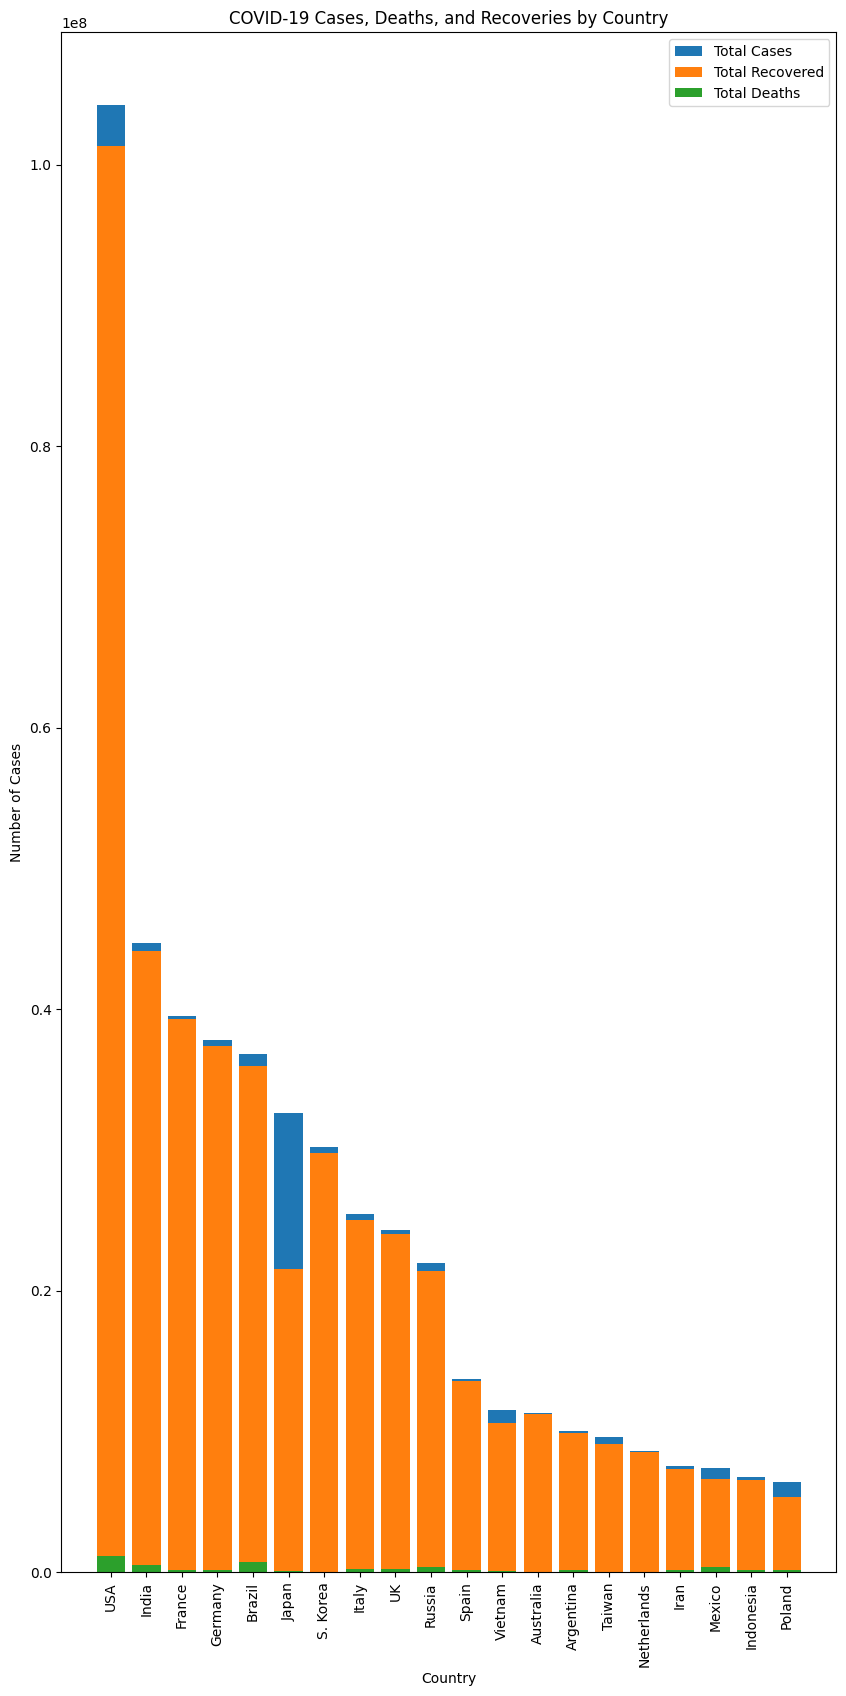

In [45]:
plt.figure(figsize=(10,20))
plt.bar(df['Country'].head(20), df['Total Cases'].head(20), label='Total Cases')
plt.bar(df['Country'].head(20), df['Total Recovered'].head(20), label='Total Recovered')
plt.bar(df['Country'].head(20), df['Total Deaths'].head(20), label='Total Deaths')
plt.title('COVID-19 Cases, Deaths, and Recoveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

For this part we used the matplotlib.pyplot library to create a chart with multiple bars representing COVID-19 cases, deaths, and recoveries for the top 20 countries. This code creates a bar chart with three sets of bars representing the total cases(blue), total recoveries(orange), and total deaths (green) for the top 20 countries. The chart provides a visual comparison of the COVID-19 data for these countries.Once again USA leads other countries and Poland is the last one.

### Top 7 Countries Statistics

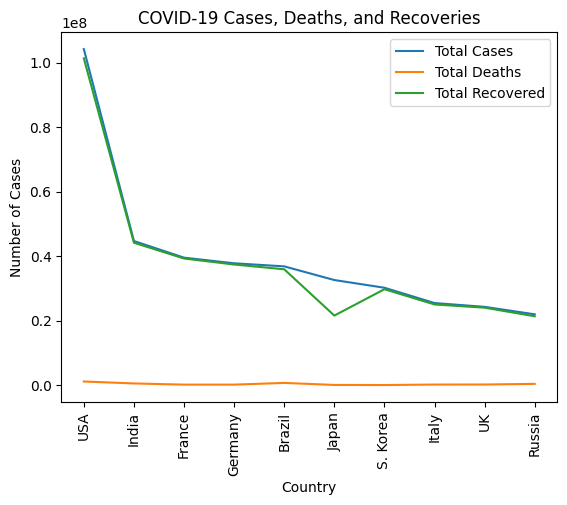

In [47]:
plt.plot(df['Country'].head(10), df['Total Cases'].head(10), label='Total Cases')
plt.plot(df['Country'].head(10), df['Total Deaths'].head(10), label='Total Deaths')
plt.plot(df['Country'].head(10), df['Total Recovered'].head(10), label='Total Recovered')
plt.title('COVID-19 Cases, Deaths, and Recoveries')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The code uses the matplotlib.pyplot library to create a line plot comparing COVID-19 cases, deaths, and recoveries for the top 10 countries.The graph provides a visual representation of the data and allows for easy comparison between the different categories. Blue colored line represents total cases, orange line represents total deats and green line represents total recoveries. 

United States: The United States had the highest number of COVID-19 cases and deaths among the G7 countries. As of September 2021, there were over 40 million cases and more than 650000 deaths reported in the US.

India: India had over 33 million cases and more than 440,000 deaths acccording to the report of Septemer 2021. The country holds the second place of the Covid 19 cases and third plase of deaths after USA and Brazil.

France: France had over 6.8 million cases and more than 116,000 deaths reported as of September 2021.

Germany: Germany had over 4.2 million cases and more than 93,000 deaths reported as of September 2021.

Brazil: Brazil had reported 21 million cases of Covid 19 and more than 590,000 death cases. The country holds the third place of Covid 19 cases, and second place of Covid 19 death cases.

Japan: Japan had over 1.5 million cases and more than 16,000 deaths reported as of September 2021.

S. Korea: S. Korea had reported over 300,000 cases of Covid 19 and more that 2,400 death cases as of September 2021 report.

Italy: Italy had over 4.6 million cases and more than 130,000 deaths reported as of September 2021.

United Kingdom: The United Kingdom had over 7 million cases and more than 135,000 deaths reported as of September 2021.

Russia: Russia had reported over 7.1 million cases of Covid 19 with over 190000 death cases by September 2021

# Covid-19 In Armenia

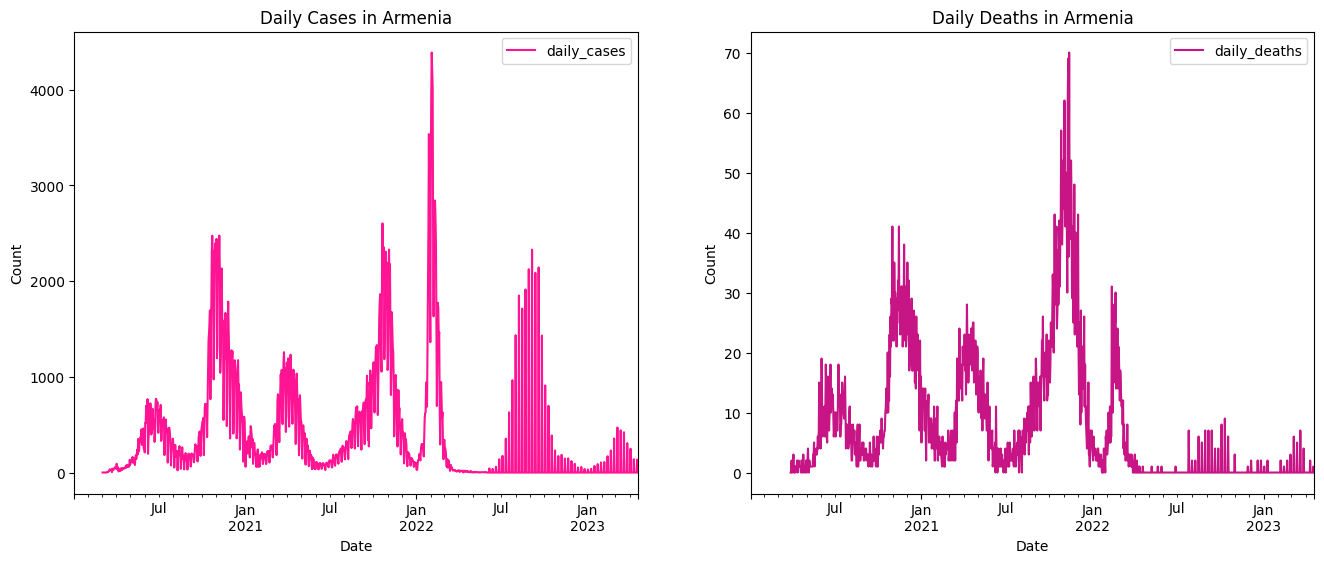

In [11]:
# Select only the columns we need
df2_1 = df2[["location", "date", "total_cases", "total_deaths", "population"]].copy()

# Convert the date column to datetime format
df2_1["date"] = pd.to_datetime(df2_1["date"])

# Calculate the daily cases and deaths
df2_1["daily_cases"] = df2_1.groupby("location")["total_cases"].diff()
df2_1["daily_deaths"] = df2_1.groupby("location")["total_deaths"].diff()

# Calculate the case and death rates per 100,000 population
df2_1["case_rate"] = (df2_1["total_cases"] / df2_1["population"]) * 100000
df2_1["death_rate"] = (df2_1["total_deaths"] / df2_1["population"]) * 100000

# Filter for Armenia and plot the daily cases and deaths
armenia_data = df2_1[df2_1["location"] == "Armenia"].copy()

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Define color scheme
colors = ["deeppink", "mediumvioletred"]

# Plot daily cases in the first subplot
armenia_data.plot(x="date", y="daily_cases", kind="line", ax=ax1, color=colors[0])
ax1.set_title("Daily Cases in Armenia")
ax1.set_xlabel("Date")
ax1.set_ylabel("Count")

# Plot daily deaths in the second subplot
armenia_data.plot(x="date", y="daily_deaths", kind="line", ax=ax2, color=colors[1])
ax2.set_title("Daily Deaths in Armenia")
ax2.set_xlabel("Date")
ax2.set_ylabel("Count")

# Show the plots
plt.show()

### Tests and Deaths Comparison in Armenia

In [ ]:
total_tests = 446008
deaths = 8717

deaths_area = deaths / total_tests * 100

fig, ax = plt.subplots()

big_circle = plt.Circle((0, 0), 0.5, color='black', alpha=0.3)
ax.add_artist(big_circle)

deaths_circle = plt.Circle((0, 0), deaths_area / 200, color='blue', alpha=0.5)
ax.add_artist(deaths_circle)

ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

ax.set_title('COVID-19 Tests and Deaths Comparison in Armenia')
ax.set_xlabel('Total Tests: ' + str(total_tests))
ax.annotate('Deaths: ' + str(deaths), (0, 0), ha='center')
plt.show()

The code creates a circular visualization where a large black circle (we changed the opacity) represents the total tests, and a smaller blue circle (again, opacity is changed) represents the proportionate area of COVID-19 deaths compared to the total tests. The plot includes labels and a title to provide context and information about the data being represented.As we can see, circles are centered

### Total Cases and Population Comparison in Armenia

In [ ]:
pop = 2971966
Total = 446008

Total_area = Total / pop * 100

fig, ax = plt.subplots()

big_circle = plt.Circle((0, 0), 0.5, color='black', alpha=0.3)
ax.add_artist(big_circle)

Total_circle = plt.Circle((0, 0), Total_area / 200, color='blue', alpha=0.5)
ax.add_artist(Total_circle)

ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

ax.set_title('COVID-19 v')
ax.set_xlabel('Population: ' + str(pop))
ax.annotate('Total Cases: ' + str(Total), (0, 0), ha='center')

plt.show()

The code creates a circular visualization where a large black circle (with certain opacity) represents the population of a region, and a smaller blue circle (with certain opacity) represents the proportionate area of total COVID-19 cases compared to the population. The plot includes labels and a title to provide context and information about the data being represented.

# Predicting Models(Linear Regression)

Linear Regression is a statistical method used to establish a relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variables and the dependent variable.

The process of working of Linear Regression Models involves the following steps:

Data Collection: Collect data on the variables of interest (dependent and independent variables).

Data Preparation: Prepare the data for analysis by cleaning, transforming, and formatting it into a suitable format.

Model Selection: Choose the appropriate linear regression model based on the type of dependent variable (continuous or binary) and the number of independent variables.

Model Building: Build the linear regression model by estimating the coefficients of the independent variables that best fit the dependent variable.

Model Evaluation: Evaluate the model by analyzing the significance of the coefficients, the goodness-of-fit measures, and the residuals.

Prediction: Use the model to make predictions on new data by plugging in the values of the independent variables.

Model Refinement: Refine the model by adding or removing independent variables and re-evaluating the model until a satisfactory model is obtained.

### 1. Predicting Total Cases Based on Daily New Cases

In [12]:
# Filter data for USA
data = dff[dff['location'] == 'United States']

In [13]:
# Extract relevant columns
X = data['new_cases'].values.reshape(-1, 1)
y = data['total_cases'].values.reshape(-1, 1)

In [14]:
# Train the model
model = LinearRegression().fit(X, y)

In [15]:
# Predict total cases for next 3 days
days = [[i] for i in range(1, 4)]
total_cases = model.predict(days)

In [16]:
# Print the predictions
print("Total cases for daily new cases:", total_cases)

Total cases for daily new cases: [[45996225.94365041]
 [45996246.6795589 ]
 [45996267.41546739]]


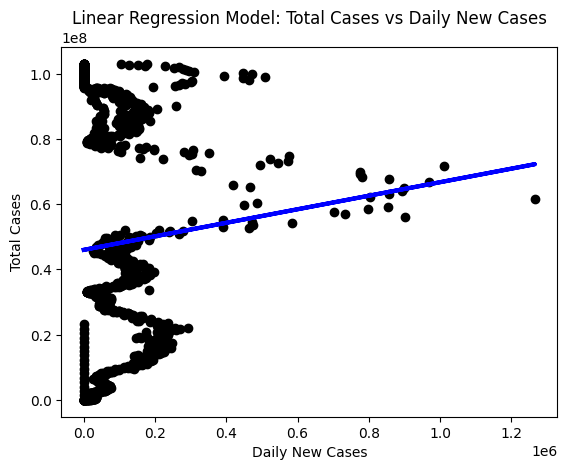

In [17]:
# Visualize the model
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.xlabel("Daily New Cases")
plt.ylabel("Total Cases")
plt.title("Linear Regression Model: Total Cases vs Daily New Cases")
plt.show()

This code uses linear regression to predict the total number of cases based on the daily new cases reported in the dataset. The data is filtered to only include records for the United States. The relevant columns are extracted and used to train the model. The model is then used to predict the total number of cases for the next three days. Finally, the model is visualized with a scatter plot of the data points and a line representing the regression model.

### 2. Predicting Total Cases Based on Weekly New Cases

In [18]:
data2 = dff[dff['location'] == 'United States']

In [19]:
data2['date'] = pd.to_datetime(data2['date'])

In [20]:
weekly_cases = data2.groupby(pd.Grouper(key='date', freq='W'))['new_cases'].sum().reset_index()

In [21]:
# Extract relevant columns
X = weekly_cases.index.values.reshape(-1, 1)
y = weekly_cases['new_cases'].values.reshape(-1, 1)

In [22]:
# Train the model
model = LinearRegression().fit(X, y)

In [23]:
# Predict total cases for next 3 weeks
weeks = [[i] for i in range(weekly_cases.shape[0]+1, weekly_cases.shape[0]+4)]
total_cases = model.predict(weeks)

In [24]:
# Print the predictions
print("Total cases for weekly new cases:", total_cases)

Total cases for weekly new cases: [[731905.54980045]
 [733458.50987109]
 [735011.46994173]]


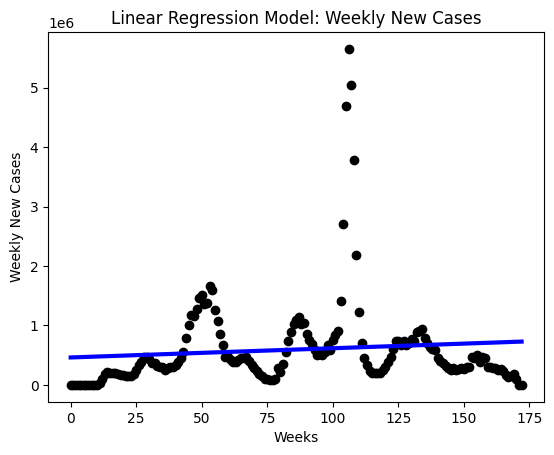

In [25]:
# Visualize the model
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.xlabel("Weeks")
plt.ylabel("Weekly New Cases")
plt.title("Linear Regression Model: Weekly New Cases")
plt.show()

This code uses linear regression to predict the total number of cases based on the weekly new cases reported in the dataset. The data is filtered to only include records for the United States. The weekly new cases are calculated by grouping the data by week and summing the new cases column. The relevant columns are then extracted and used to train the model. The model is then used to predict the total number of cases for the next three weeks. Finally, the model is visualized with a scatter plot of the data points and a line representing the regression model.

### 3. Predicting Total Cases Based on Monthly New Cases

In [26]:
# Filter the data for the USA
usa_data = dff[dff['location'] == 'United States']

In [27]:
# Create a new column for month-year
usa_data['month_year'] = pd.to_datetime(usa_data['date']).dt.to_period('M')

In [28]:
# Group the data by month-year and calculate the total cases for each month
monthly_data = usa_data.groupby('month_year')['new_cases'].sum().reset_index()

In [29]:
# Create the feature matrix and target vector
X = monthly_data.index.values.reshape(-1, 1)
y = monthly_data['new_cases'].values.reshape(-1, 1)

In [30]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
# Predict the total cases for the next 3 months
pred_X = np.array([X.max()+1, X.max()+2, X.max()+3]).reshape(-1, 1)
pred_y = model.predict(pred_X)

In [32]:
# Print the predicted total cases for the next 3 months
print("Total cases for monthly new cases:", pred_y)

Total cases for monthly new cases: [[3104707.68076923]
 [3130574.6456848 ]
 [3156441.61060037]]


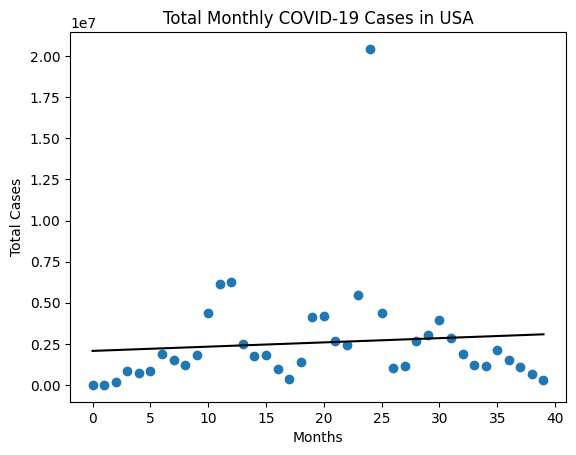

In [33]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='black')
plt.title('Total Monthly COVID-19 Cases in USA')
plt.xlabel('Months')
plt.ylabel('Total Cases')
plt.show()

This model uses monthly total cases to predict the total cases for the next 3 months in the USA. The linear regression line shows a positive trend indicating an increase in total cases over time. The predicted values for the next 3 months show a continued increase in total cases.

Linear Regression Models works in this cases. 

After passing huge testing and preparing processes on those 3 models, we can see the result is not the same for the 3 models.

In the Mouthly Cases the predicted line is closer to the real results.

# Conclusion: 

In conclusion, the goal of our study was to use a variety of datasets and Python programs to show Covid-19-related data. We were able to easier understand the data's interpretation and the Covid-19 statistics thanks to the graphics. The visualizations showed the overall instances, the top countries affected, the cases that were active, the cases that were fatal, and other crucial indicators. We also looked into the connection between GDP levels, smoking, and death rates. Additionally, based on daily, weekly, and monthly new instances, we used linear regression models to forecast the total cases. Overall, our investigation offered insightful information about the Covid-19 epidemic and its effects on various factors and countries.